In [2]:
#References: https://www.datacamp.com/tutorial/decision-tree-classification-python, https://scikit-learn.org/dev/modules/generated/sklearn.tree.plot_tree.html
#Importing necessary libraries.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

#Importing the cleaned data that includes GHG Intensity Clusters that Libby created and the factors that John created. Thank you Libby and John!
clusterData = pd.read_csv('/Users/nataliesimkins/Downloads/updatedBuildingData.csv')

In [7]:
#Assigning the dependent and independent variables.
#Not every variable is included in the independent variables, since some of them relate to location and we do not want it to predict based on location or neighborhood. GHG Emissions have also been excluded as they are the basis of the clusters. Some of the administrative factors have also been excluded. 

X = clusterData[['YearBuilt','NumberofFloors','NumberofBuildings','PropertyGFATotal','ENERGYSTARScore','EPAPropertyType_College/University',
       'EPAPropertyType_Distribution Center',
       'EPAPropertyType_Hospital (General Medical & Surgical)',
       'EPAPropertyType_Hotel', 'EPAPropertyType_K-12 School',
       'EPAPropertyType_Laboratory',
       'EPAPropertyType_Manufacturing/Industrial Plant',
       'EPAPropertyType_Medical Office', 'EPAPropertyType_Mixed Use Property',
       'EPAPropertyType_Multifamily HR (10+)',
       'EPAPropertyType_Multifamily Housing',
       'EPAPropertyType_Multifamily LR (1-4)',
       'EPAPropertyType_Multifamily MR (5-9)',
       'EPAPropertyType_Non-Refrigerated Warehouse', 'EPAPropertyType_Office',
       'EPAPropertyType_Other', 'EPAPropertyType_Parking',
       'EPAPropertyType_Refrigerated Warehouse',
       'EPAPropertyType_Residence Hall/Dormitory',
       'EPAPropertyType_Retail Store', 'EPAPropertyType_Self-Storage Facility',
       'EPAPropertyType_Supermarket/Grocery Store',
       'EPAPropertyType_Worship Facility', 'ComplianceStatus_Compliant',
       'ComplianceStatus_Contact the Help Desk',
       'ComplianceStatus_Not Compliant',
       'ComplianceIssue_Account Requires Verification',
       'ComplianceIssue_Default Data',
       'ComplianceIssue_Missing EUI or Utility Data',
       'ComplianceIssue_Missing EUI or Utility Data and Account Requires Verification',
       'ComplianceIssue_Missing EUI, Incomplete Electricity Data',
       'ComplianceIssue_Missing EUI, Incomplete Natural Gas Data',
       'ComplianceIssue_No Issue',
       'BuildingType_Campus', 'BuildingType_Multifamily HR (10+)',
       'BuildingType_Multifamily LR (1-4)',
       'BuildingType_Multifamily MR (5-9)', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA',
       'BuildingType_SPS-District K-12']]

y = clusterData[['GHGIntensityCluster']]

#Splitting the data into training and testing sets. I chose a 80% training and 20% testing split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
clf = DecisionTreeClassifier(random_state=12)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.5348837209302325


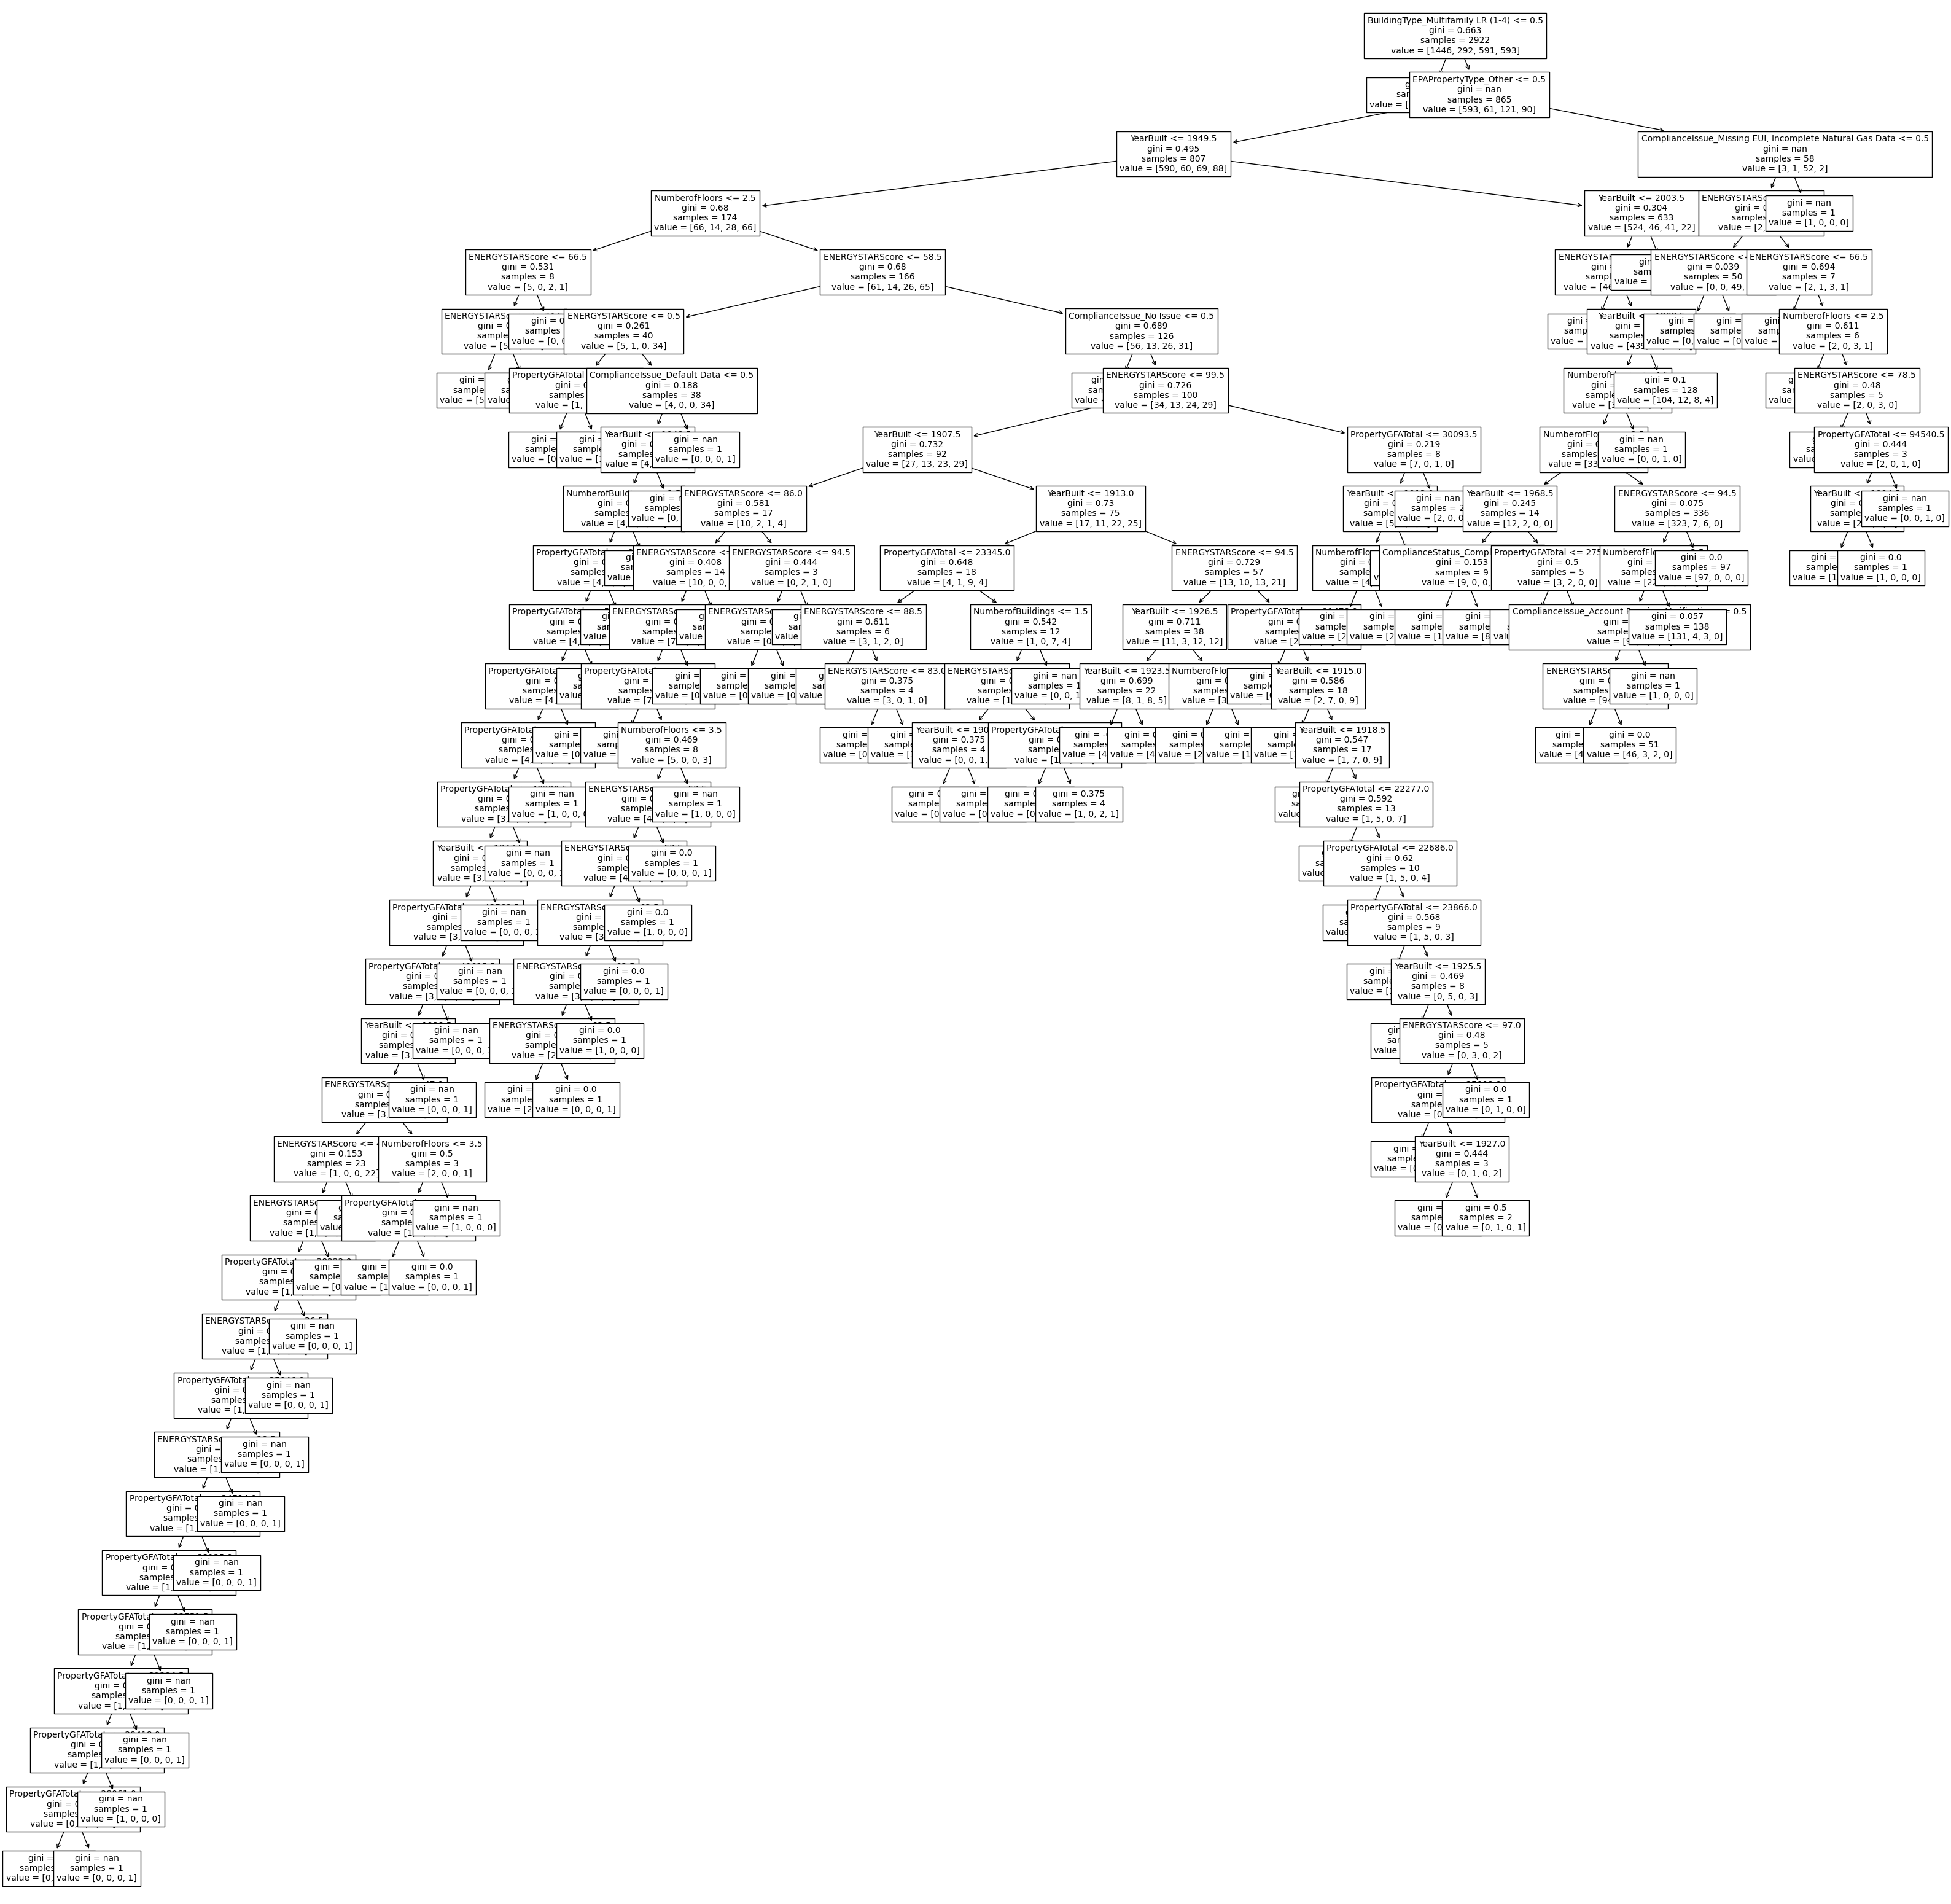

In [8]:
#Printing accuracy findings of the model. 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Graphing the decision tree.
plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf, feature_names = X.columns, fontsize=10)

#Since adding many more independent variables to our model, the overall accuracy has decreased to 53.49%. 